In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
bmp_dir = '../DMD_inputs/'
target_img = '678_Block.bmp'

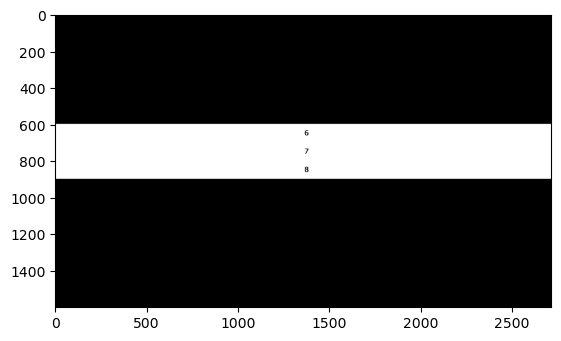

In [3]:
img = cv.imread(bmp_dir + target_img, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [4]:
for angle in range(0, 360, 30):
    M = cv.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1)
    rotated_img = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
    # white to black
    if angle == 0: print(np.max(rotated_img))
    rotated_img = 255 - rotated_img
    # save the rotated image
    cv.imwrite(bmp_dir + 'rotated_' + str(angle) + '_' + target_img, rotated_img)

255


True

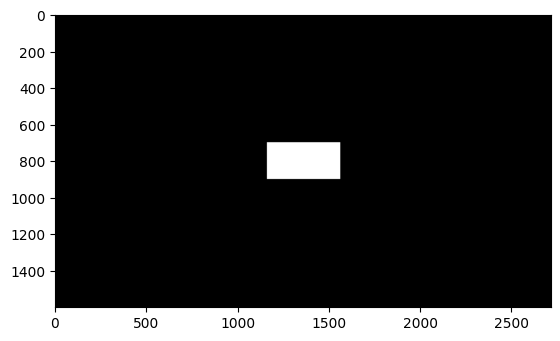

In [15]:
# crate a rectange in the center of the image
w, h = 400, 200
# empty image first 
rect = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
center_x = rect.shape[1] // 2
center_y = rect.shape[0] // 2
rect = cv.rectangle(rect, (center_x - w//2, center_y - h//2), (center_x + w//2, center_y + h//2), 255, -1)
plt.imshow(rect, cmap='gray')
cv.imwrite(bmp_dir + 'rect.bmp', rect)
# opposite version
rect = 255 - rect
cv.imwrite(bmp_dir + 'rect_opposite.bmp', rect)

In [16]:
# pure black and white image
black = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
white = 255 - black
cv.imwrite(bmp_dir + 'black.bmp', black)
cv.imwrite(bmp_dir + 'white.bmp', white)

True